# **Sentiment Analysis Evaluation**
**DESCRIPTION**: <br>
This notebook will evaluate the results of sentiment analysis over customer emails, comparing using AWS Comprehend, OpenAI GPT-3.5-Turbo model, and a RoBERTa base model.
---

**Author:** Kyle Dyett<br>
**Last Updated By:** Kyle Dyett<br>
**Last Updated Date:** 02/10/2024

## Import Modules

In [76]:
import pandas as pd
import os

## Read Data

### Input Files (Emails)

In [77]:
# List all files in the directory
files = [f for f in os.listdir(os.getcwd()+'\Files') if os.path.isfile(os.path.join(os.getcwd()+'\Files', f))]
files = [f for f in files if f.startswith('Email')]

for i, f in enumerate(files):
    print(f'{i+1}: {f}')

1: Email1.csv
2: Email10.csv
3: Email11.csv
4: Email12.csv
5: Email13.csv
6: Email14.csv
7: Email15.csv
8: Email16.csv
9: Email2.csv
10: Email3.csv
11: Email4.csv
12: Email5.csv
13: Email6.csv
14: Email7.csv
15: Email8.csv
16: Email9.csv


In [78]:
emails = pd.DataFrame(columns=['Email ID', 'Subject', 'Body', 'Sentiment'])
for f in files:
    email = pd.read_csv(f"{os.getcwd()}\\Files\\{f}", encoding='utf-8', encoding_errors='ignore')
    emails = pd.concat([emails, email], ignore_index=True)

In [79]:
emails.head()

,Email ID,Subject,Body,Sentiment
0,1,Inaccurate Balance Statement – Urgent Attentio...,"Hi,\n\nI have just reviewed my latest statemen...",Negative
1,10,Satisfied with Early Settlement Process,"Hello,\n\nI recently settled my Hire Purchase ...",Positive
2,11,Complaint About Payment Processing,"To Whom It May Concern,\n\nI am extremely unha...",Negative
3,12,Unacceptable Delay in Response,"Hi,\n\nI’m really unhappy with the lack of res...",Negative
4,13,Thank You for the Great Service,"Hello,\n\nI just wanted to drop a quick messag...",Positive


### RoBERTa Sentiment File

In [80]:
rob = pd.read_csv(os.getcwd()+'\\Files\\ROBERTA_SENTIMENT_ANALYSIS.csv')
rob = rob.iloc[:,1:]

In [81]:
rob.head()

,Email ID,Roberta_neg,Roberta_neu,Roberta_pos,Roberta_class
0,1,0.956653,0.038665,0.004682,NEGATIVE
1,2,0.950637,0.045176,0.004187,NEGATIVE
2,3,0.002811,0.024402,0.972787,POSITIVE
3,4,0.037410,0.261490,0.701100,POSITIVE
4,5,0.933342,0.060250,0.006408,NEGATIVE


### Open AI Sentiment File

In [82]:
oai = pd.read_csv(os.getcwd()+'\\Files\\OPENAI_SENTIMENT_ANALYSIS.csv')
oai = oai.iloc[:,1:]

In [83]:
oai.head()

,Email ID,negative_gpt,neutral_gpt,positive_gpt,gpt_class
0,1,1.0000,0.0000,0.0000,NEGATIVE
1,2,0.7750,0.2250,0.0000,NEGATIVE
2,3,0.0000,0.0000,1.0000,POSITIVE
3,4,0.0000,0.1769,0.8231,POSITIVE
4,5,0.8192,0.1808,0.0000,NEGATIVE


### AWS Comprehend Sentiment File

In [84]:
aws = pd.read_csv(os.getcwd()+'\\Files\\AWS_SENTIMENT_ANALYSIS.csv')
aws.head()

,id,email_id,mixed_sentiment,negative_sentiment,neutral_sentiment,postive_sentiment,sentiment,text
0,aeac938a-5a6c-4054-ba0e-2c47c069d8aa,11,0.000020,0.997705,0.001895,0.000380,NEGATIVE,"""To Whom It May Concern,\n\nI am extremely unh..."
1,bdc8b4ec-9b99-4c47-9211-5e1639f56d3f,4,0.006867,0.104288,0.735231,0.153613,NEUTRAL,"""Dear Customer Service,\n\nI hope you are well..."
2,80f30322-40b0-43c2-acd2-b3bd60f6661e,9,0.039616,0.038784,0.661103,0.260497,NEUTRAL,"""Dear Support Team,\n\nI’m reviewing my loan t..."
3,523343eb-0a03-45dc-9b26-d249cbee37fb,12,0.000379,0.986485,0.012330,0.000806,NEGATIVE,"""Hi,\n\nI’m really unhappy with the lack of re..."
4,501b19e7-a83f-4414-a812-348cbaabf92d,6,0.000029,0.000868,0.949755,0.049348,NEUTRAL,"""Hi,\n\nCould you please provide me with an up..."


## Remove & Rename Columns

In [21]:
aws = aws[['email_id', 'mixed_sentiment', 'negative_sentiment', 'neutral_sentiment', 'postive_sentiment', 'sentiment']].copy()
aws.sort_values(by='email_id', inplace=True)
aws.head()

,email_id,mixed_sentiment,negative_sentiment,neutral_sentiment,postive_sentiment,sentiment
15,1,0.000510,0.949544,0.042562,0.007384,NEGATIVE
7,2,0.000018,0.999094,0.000583,0.000306,NEGATIVE
9,3,0.000025,0.000297,0.004970,0.994708,POSITIVE
1,4,0.006867,0.104288,0.735231,0.153613,NEUTRAL
13,5,0.000034,0.990873,0.008354,0.000739,NEGATIVE


In [86]:
columns_rename= {
    'email_id': 'Email ID',
    'mixed_sentiment': 'mixed_aws',
    'negative_sentiment': 'negative_aws',
    'neutral_sentiment': 'neutral_aws',
    'postive_sentiment': 'postive_aws',
    'sentiment': 'aws_sentiment'
}
aws.rename(columns_rename, axis=1, inplace=True)

## Merge Data

In [87]:
df = pd.merge(emails,
              rob,
              how='inner',
              on='Email ID')
print(f"Successfully Merged RoBERTa Sentiment, Shape of Dataframe: {df.shape}")

Successfully Merged RoBERTa Sentiment, Shape of Dataframe: (16, 8)


In [88]:
df = df.merge(oai,
              how='inner',
              on='Email ID')
print(f"Successfully Merged Open AI Sentiment, Shape of Dataframe: {df.shape}")

Successfully Merged Open AI Sentiment, Shape of Dataframe: (16, 12)


In [89]:
df = df.merge(aws,
              how='inner',
              on='Email ID')
print(f"Successfully Merged AWS Sentiment, Shape of Dataframe: {df.shape}")

Successfully Merged AWS Sentiment, Shape of Dataframe: (16, 17)


In [90]:
df= df.sort_values(by='Email ID')
df.head()

,Email ID,Subject,Body,Sentiment,Roberta_neg,Roberta_neu,Roberta_pos,Roberta_class,negative_gpt,neutral_gpt,positive_gpt,gpt_class,mixed_aws,negative_aws,neutral_aws,postive_aws,aws_sentiment
0,1,Inaccurate Balance Statement – Urgent Attentio...,"Hi,\n\nI have just reviewed my latest statemen...",Negative,0.956653,0.038665,0.004682,NEGATIVE,1.0000,0.0000,0.0000,NEGATIVE,0.000510,0.949544,0.042562,0.007384,NEGATIVE
8,2,Unexplained Charges on My Account,"Dear Customer Service,\n\nI am extremely disap...",Negative,0.950637,0.045176,0.004187,NEGATIVE,0.7750,0.2250,0.0000,NEGATIVE,0.000018,0.999094,0.000583,0.000306,NEGATIVE
9,3,Gratitude for Quick Support,"Hello Customer Service,\n\nI just wanted to ta...",Positive,0.002811,0.024402,0.972787,POSITIVE,0.0000,0.0000,1.0000,POSITIVE,0.000025,0.000297,0.004970,0.994708,POSITIVE
10,4,Request for Statement Copy,"Dear Customer Service,\n\nI hope you are well....",Neutral,0.037410,0.261490,0.701100,POSITIVE,0.0000,0.1769,0.8231,POSITIVE,0.006867,0.104288,0.735231,0.153613,NEUTRAL
11,5,Unresponsive Customer Service,"Hi,\n\nI’ve tried contacting your team multipl...",Negative,0.933342,0.060250,0.006408,NEGATIVE,0.8192,0.1808,0.0000,NEGATIVE,0.000034,0.990873,0.008354,0.000739,NEGATIVE


In [97]:
df['Sentiment'] = df['Sentiment'].str.upper()
df['Sentiment'] = df['Sentiment'].str.strip()

In [92]:
for i, col in enumerate(df.columns):
    print(f'Column {i+1}: {col}, Data Type: ', df[col].dtypes)

Column 1: Email ID, Data Type:  object
Column 2: Subject, Data Type:  object
Column 3: Body, Data Type:  object
Column 4: Sentiment, Data Type:  object
Column 5: Roberta_neg, Data Type:  float64
Column 6: Roberta_neu, Data Type:  float64
Column 7: Roberta_pos, Data Type:  float64
Column 8: Roberta_class, Data Type:  object
Column 9: negative_gpt, Data Type:  float64
Column 10: neutral_gpt, Data Type:  float64
Column 11: positive_gpt, Data Type:  float64
Column 12: gpt_class, Data Type:  object
Column 13: mixed_aws, Data Type:  float64
Column 14: negative_aws, Data Type:  float64
Column 15: neutral_aws, Data Type:  float64
Column 16: postive_aws, Data Type:  float64
Column 17: aws_sentiment, Data Type:  object


## Accuracy

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### AWS Sentiment Analysis

In [119]:
print(classification_report(df['Sentiment'], df['aws_sentiment'], target_names=('Negative','Neutral','Positive')))

              precision    recall  f1-score   support

    Negative       1.00      0.83      0.91         6
     Neutral       0.86      0.86      0.86         7
    Positive       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.87      0.90      0.87        16
weighted avg       0.89      0.88      0.88        16



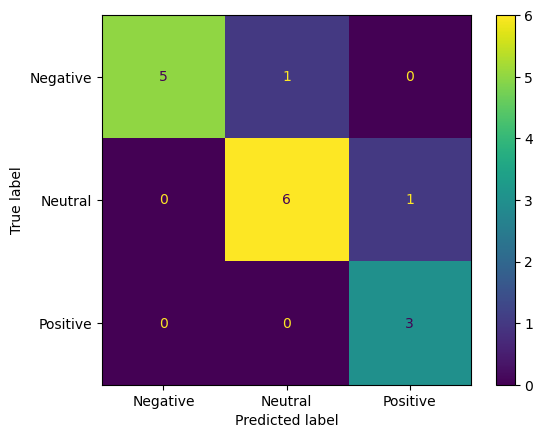

In [101]:
cm = confusion_matrix(df['Sentiment'], df['aws_sentiment'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=('Negative','Neutral','Positive'))
disp.plot()

In [108]:
df[df['Sentiment']!=df['aws_sentiment']]
# df[df['Sentiment']!=df['aws_sentiment']]['Body'].iloc[0]

,Email ID,Subject,Body,Sentiment,Roberta_neg,Roberta_neu,Roberta_pos,Roberta_class,negative_gpt,neutral_gpt,positive_gpt,gpt_class,mixed_aws,negative_aws,neutral_aws,postive_aws,aws_sentiment
14,8,Request for Faster Response Time,"Hi there,\n\nI reached out a few days ago rega...",NEGATIVE,0.239014,0.450408,0.310578,NEUTRAL,0.0846,0.4026,0.5128,POSITIVE,0.128335,0.070486,0.549908,0.251271,NEUTRAL
7,16,Slight Delay in Payment Processing,"Hi there,\n\nI noticed that my payment took a ...",NEUTRAL,0.072706,0.310697,0.616598,POSITIVE,0.0191,0.1642,0.8167,POSITIVE,0.072409,0.013883,0.288594,0.625113,POSITIVE


### RoBERTa Sentiment Analysis

In [117]:
print(classification_report(df['Sentiment'], df['Roberta_class'], target_names=('Negative','Neutral','Positive')))

              precision    recall  f1-score   support

    Negative       1.00      0.83      0.91         6
     Neutral       0.67      0.29      0.40         7
    Positive       0.38      1.00      0.55         3

    accuracy                           0.62        16
   macro avg       0.68      0.71      0.62        16
weighted avg       0.74      0.62      0.62        16



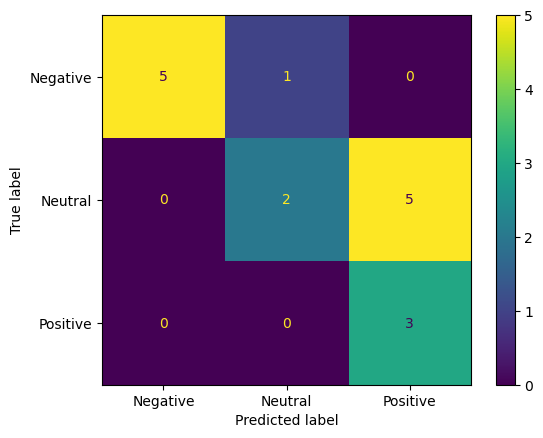

In [118]:
cm_rob = confusion_matrix(df['Sentiment'], df['Roberta_class'])
disp_rob = ConfusionMatrixDisplay(confusion_matrix=cm_rob, display_labels=('Negative','Neutral','Positive'))
disp_rob.plot()

In [111]:
df[df['Sentiment']!=df['Roberta_class']]
# df[df['Sentiment']!=df['Roberta_class']]['Body'].iloc[0]

,Email ID,Subject,Body,Sentiment,Roberta_neg,Roberta_neu,Roberta_pos,Roberta_class,negative_gpt,neutral_gpt,positive_gpt,gpt_class,mixed_aws,negative_aws,neutral_aws,postive_aws,aws_sentiment
10,4,Request for Statement Copy,"Dear Customer Service,\n\nI hope you are well....",NEUTRAL,0.037410,0.261490,0.701100,POSITIVE,0.0000,0.1769,0.8231,POSITIVE,0.006867,0.104288,0.735231,0.153613,NEUTRAL
12,6,Update on Loan Balance,"Hi,\n\nCould you please provide me with an upd...",NEUTRAL,0.021373,0.401582,0.577044,POSITIVE,0.0000,0.2717,0.7283,POSITIVE,0.000029,0.000868,0.949755,0.049348,NEUTRAL
14,8,Request for Faster Response Time,"Hi there,\n\nI reached out a few days ago rega...",NEGATIVE,0.239014,0.450408,0.310578,NEUTRAL,0.0846,0.4026,0.5128,POSITIVE,0.128335,0.070486,0.549908,0.251271,NEUTRAL
15,9,Question About Loan Terms feedback,"Dear Support Team,\n\nI’m reviewing my loan te...",NEUTRAL,0.044978,0.278284,0.676738,POSITIVE,0.0000,0.2535,0.7465,POSITIVE,0.039616,0.038784,0.661103,0.260497,NEUTRAL
6,15,Follow-Up on Account Discrepancy,"Hello,\n\nI reached out last week regarding an...",NEUTRAL,0.162790,0.355176,0.482034,POSITIVE,0.0909,0.3636,0.5455,POSITIVE,0.025826,0.100197,0.460028,0.413949,NEUTRAL
7,16,Slight Delay in Payment Processing,"Hi there,\n\nI noticed that my payment took a ...",NEUTRAL,0.072706,0.310697,0.616598,POSITIVE,0.0191,0.1642,0.8167,POSITIVE,0.072409,0.013883,0.288594,0.625113,POSITIVE


### GPT Sentiment Analysis

In [120]:
print(classification_report(df['Sentiment'], df['gpt_class'], target_names=('Negative','Neutral','Positive')))

              precision    recall  f1-score   support

    Negative       1.00      0.83      0.91         6
     Neutral       0.00      0.00      0.00         7
    Positive       0.27      1.00      0.43         3

    accuracy                           0.50        16
   macro avg       0.42      0.61      0.45        16
weighted avg       0.43      0.50      0.42        16



C:\Users\kdyett\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kdyett\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kdyett\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

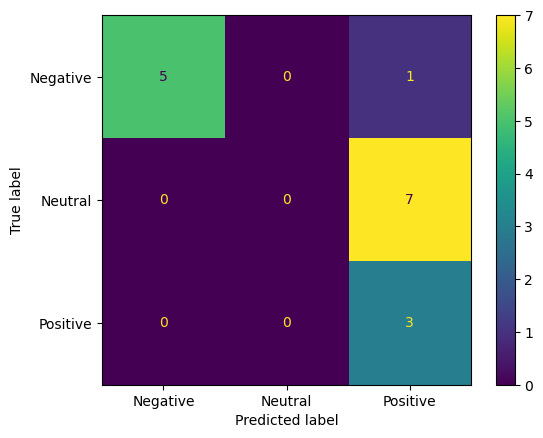

In [112]:
cm_gpt = confusion_matrix(df['Sentiment'], df['gpt_class'])
disp_gpt = ConfusionMatrixDisplay(confusion_matrix=cm_gpt, display_labels=('Negative','Neutral','Positive'))
disp_gpt.plot()

In [113]:
df[df['Sentiment']!=df['gpt_class']]
# df[df['Sentiment']!=df['gpt_class']]['Body'].iloc[0]

,Email ID,Subject,Body,Sentiment,Roberta_neg,Roberta_neu,Roberta_pos,Roberta_class,negative_gpt,neutral_gpt,positive_gpt,gpt_class,mixed_aws,negative_aws,neutral_aws,postive_aws,aws_sentiment
10,4,Request for Statement Copy,"Dear Customer Service,\n\nI hope you are well....",NEUTRAL,0.037410,0.261490,0.701100,POSITIVE,0.0000,0.1769,0.8231,POSITIVE,0.006867,0.104288,0.735231,0.153613,NEUTRAL
12,6,Update on Loan Balance,"Hi,\n\nCould you please provide me with an upd...",NEUTRAL,0.021373,0.401582,0.577044,POSITIVE,0.0000,0.2717,0.7283,POSITIVE,0.000029,0.000868,0.949755,0.049348,NEUTRAL
13,7,Inquiry About Loan Repayment Terms,"Hi there,\n\nI’ve been reviewing my loan repay...",NEUTRAL,0.132600,0.696757,0.170643,NEUTRAL,0.0000,0.3200,0.6800,POSITIVE,0.000023,0.000620,0.958776,0.040580,NEUTRAL
14,8,Request for Faster Response Time,"Hi there,\n\nI reached out a few days ago rega...",NEGATIVE,0.239014,0.450408,0.310578,NEUTRAL,0.0846,0.4026,0.5128,POSITIVE,0.128335,0.070486,0.549908,0.251271,NEUTRAL
15,9,Question About Loan Terms feedback,"Dear Support Team,\n\nI’m reviewing my loan te...",NEUTRAL,0.044978,0.278284,0.676738,POSITIVE,0.0000,0.2535,0.7465,POSITIVE,0.039616,0.038784,0.661103,0.260497,NEUTRAL
5,14,Inquiry About Payment Confirmation,"Dear Customer Service,\n\nI made my most recen...",NEUTRAL,0.235374,0.571217,0.193409,NEUTRAL,0.0218,0.2931,0.6851,POSITIVE,0.000203,0.042741,0.525947,0.431109,NEUTRAL
6,15,Follow-Up on Account Discrepancy,"Hello,\n\nI reached out last week regarding an...",NEUTRAL,0.162790,0.355176,0.482034,POSITIVE,0.0909,0.3636,0.5455,POSITIVE,0.025826,0.100197,0.460028,0.413949,NEUTRAL
7,16,Slight Delay in Payment Processing,"Hi there,\n\nI noticed that my payment took a ...",NEUTRAL,0.072706,0.310697,0.616598,POSITIVE,0.0191,0.1642,0.8167,POSITIVE,0.072409,0.013883,0.288594,0.625113,POSITIVE
